### 0. Import Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

### 1. 이미지 불러오기 및 확인

In [2]:
# 이미지 불러오기
image_path = './master/FM2-V160_master.jpeg'

# OpenCV로 이미지를 읽어오기 (흑백으로 변환)
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# 이미지 확인
if image is None:
    raise FileNotFoundError(f"이미지 파일 '{image_path}'을(를) 찾을 수 없습니다.")

print(f"이미지 로드 성공: {image.shape}")

이미지 로드 성공: (448, 448)


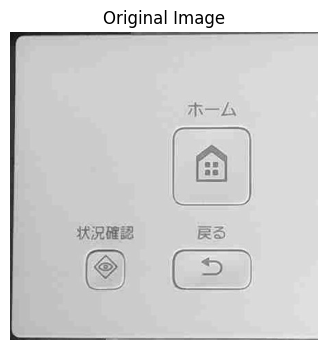

In [4]:
# 원본 이미지 시각화
plt.figure(figsize=(4, 4))
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

### 2. 데이터 증강용 코드 함수화

In [5]:
def augment_image(image, rotation_range=5, brightness_range=(0.8, 1.2), noise_std=1.5):
    """
    이미지를 회전, 명도 조정, 가우시안 노이즈 추가로 증강.
    
    Parameters:
        image (numpy.ndarray): 입력 이미지 (흑백).
        rotation_range (int): 회전 각도 범위 (예: ±10도).
        brightness_range (tuple): 명도 스케일 범위 (예: 0.8 ~ 1.2).
        noise_std (int): 가우시안 노이즈 표준편차.
        
    Returns:
        numpy.ndarray: 증강된 이미지.
    """
    # 회전
    angle = np.random.uniform(-rotation_range, rotation_range)
    height, width = image.shape
    center = (width // 2, height // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, rotation_matrix, (width, height), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_REFLECT_101)
    
    # 명도 조정
    brightness_factor = np.random.uniform(*brightness_range)
    brightened = np.clip(rotated * brightness_factor, 0, 255).astype(np.uint8)
    
    # 가우시안 노이즈 추가
    noise = np.random.normal(0, noise_std, brightened.shape).astype(np.float32)
    augmented = np.clip(brightened + noise, 0, 255).astype(np.uint8)
    
    return augmented

### 3. 데이터 증강

In [6]:
augmented_images = [augment_image(image) for _ in range(10)]

### 4. 증강 데이터 확인

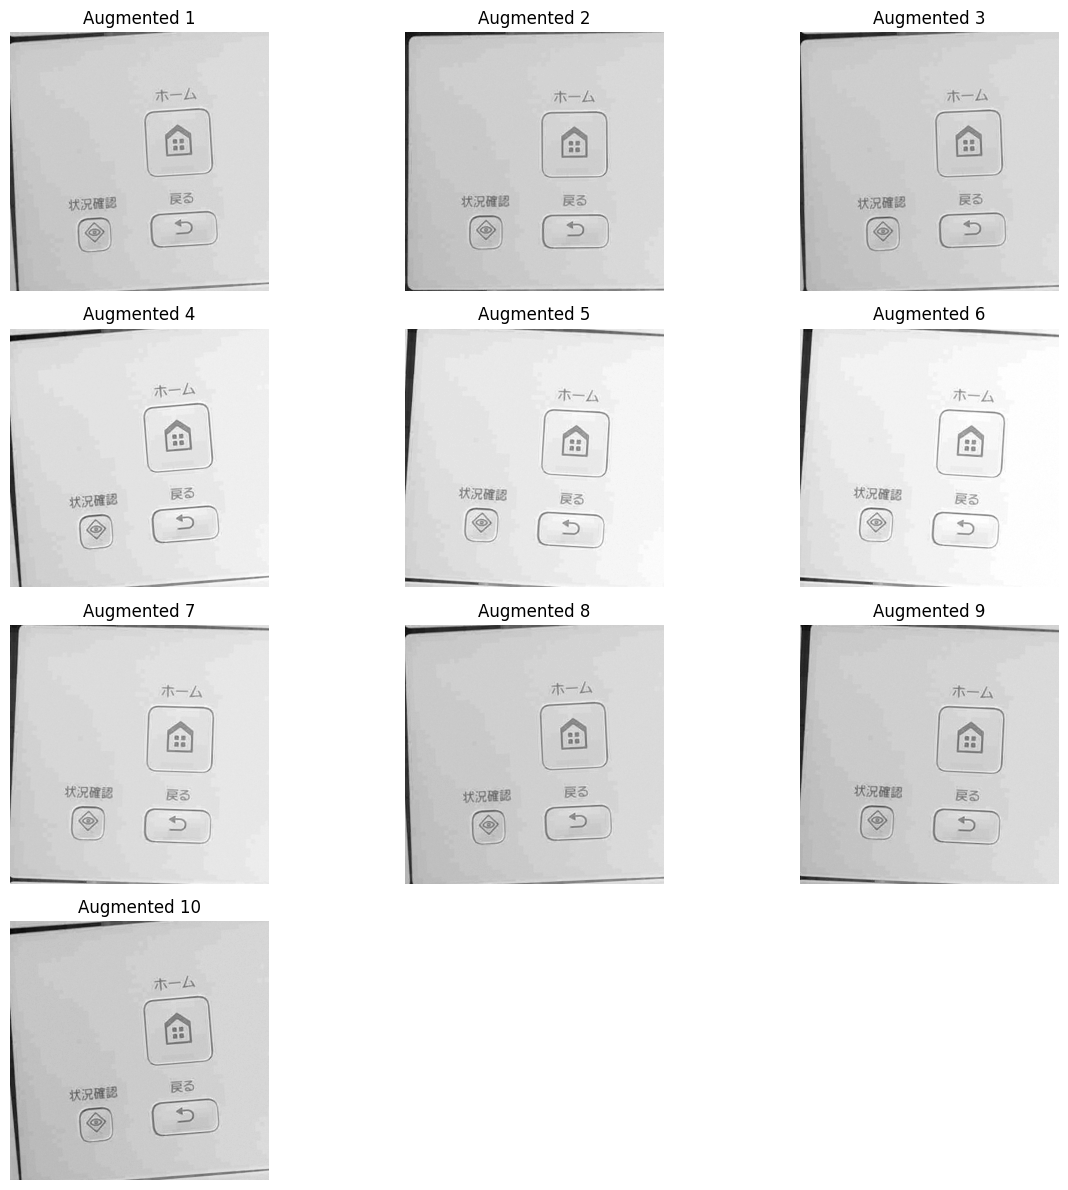

In [7]:
# 증강된 이미지 시각화
plt.figure(figsize=(12, 12))

for i, augmented_image in enumerate(augmented_images):
    plt.subplot(4, 3, i + 1)  # 4x3 그리드
    plt.imshow(augmented_image, cmap='gray')
    plt.title(f"Augmented {i + 1}")
    plt.axis('off')

plt.tight_layout()
plt.show()
